In [1]:
# Import necessary libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('code'))
from gradcam import *
from zipfile import ZipFile
from fastai.vision import * 
from fastai.metrics import error_rate
from PIL import Image
import matplotlib.pyplot as plt
# constants
path_img = 'images/data'

In [2]:
# Do initially to extract images from zip
with ZipFile('images/data_2.zip', 'r') as zip: 
    zip.extractall('images')

In [2]:
data = ImageDataBunch.from_folder(path_img, size=640, bs=8).normalize(imagenet_stats)
# data.show_batch(rows=4, figsize=(10,6))

epoch,train_loss,valid_loss,error_rate,time
0,1.667227,0.754295,0.281250,00:14
1,0.837252,0.308274,0.114583,00:11
2,0.487350,0.251460,0.093750,00:11
3,0.343395,0.138797,0.052083,00:11
4,0.229895,0.114685,0.041667,00:11
5,0.190689,0.307133,0.083333,00:11
6,0.179919,0.300099,0.125000,00:11
7,0.175144,0.189415,0.062500,00:11
8,0.150301,0.049871,0.020833,00:11
9,0.137161,0.096019,0.052083,00:11


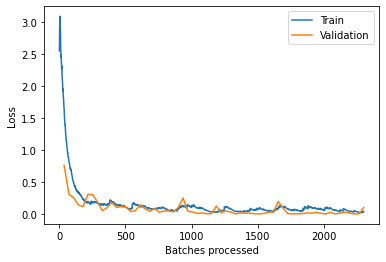

In [3]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit(64)
learn.recorder.plot_losses() 

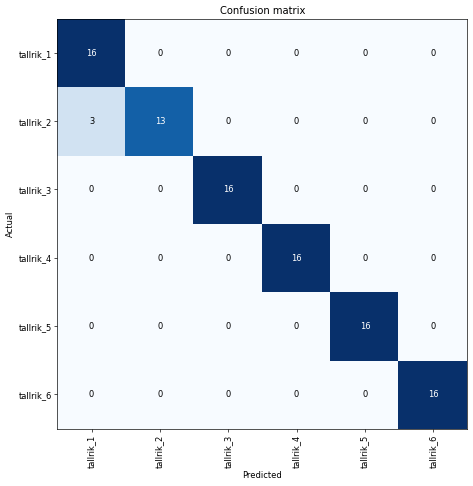

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [5]:
interp.most_confused(min_val=2)
interp.most_confused

[('tallrik_2', 'tallrik_1', 3)]

## GradCAM explanation

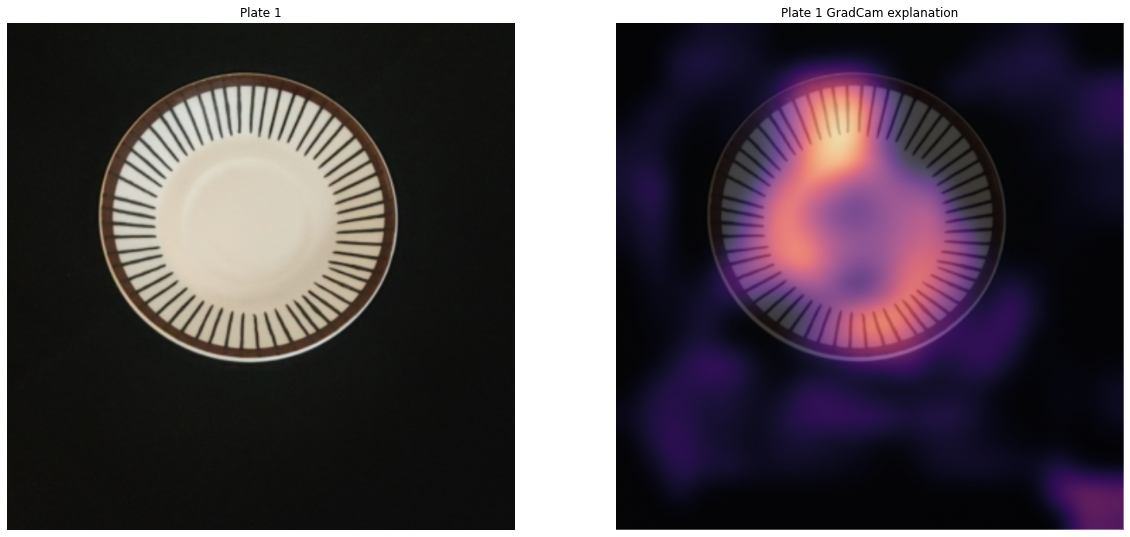

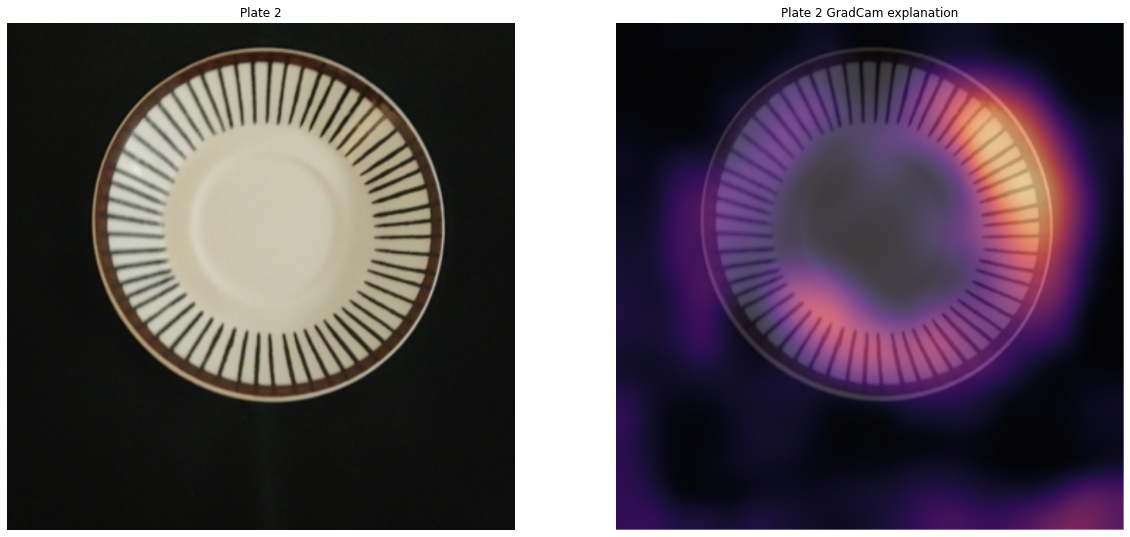

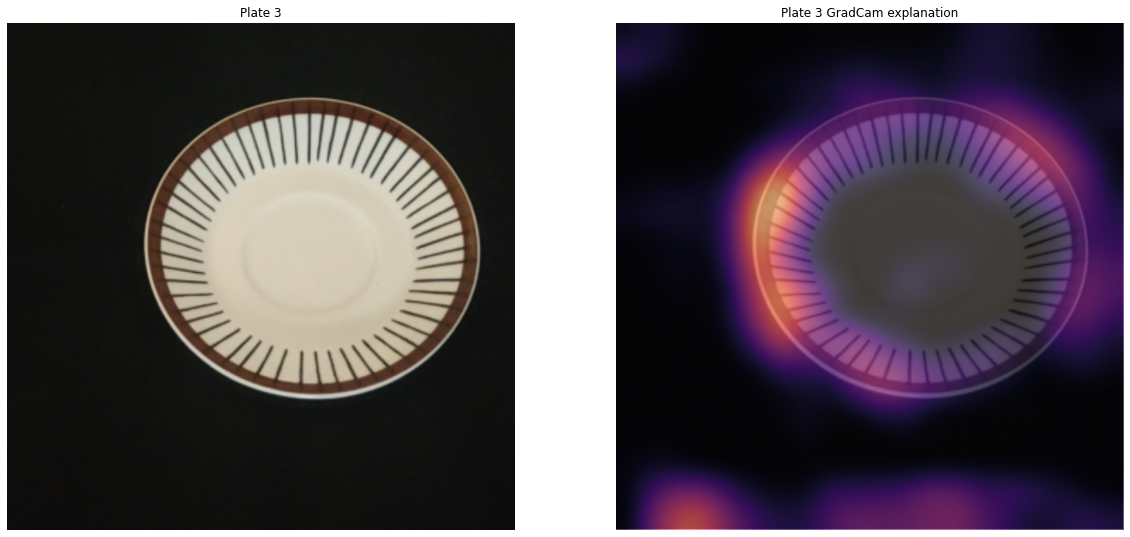

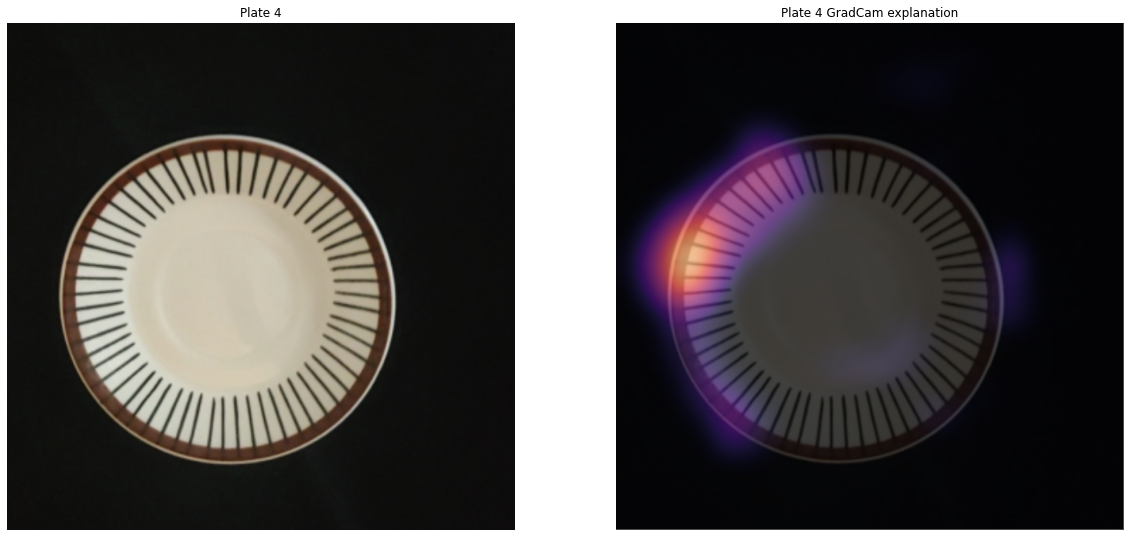

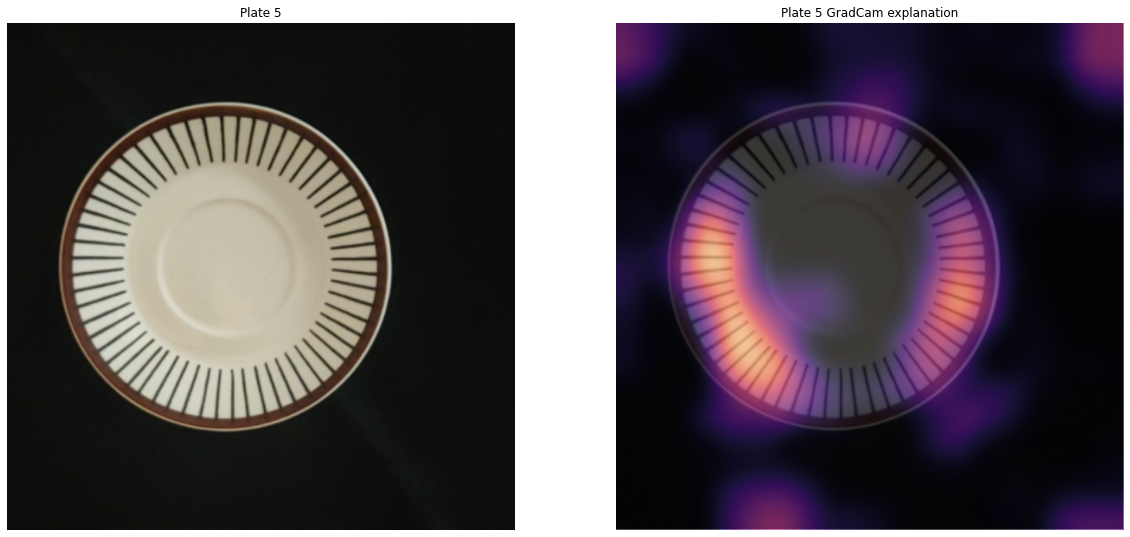

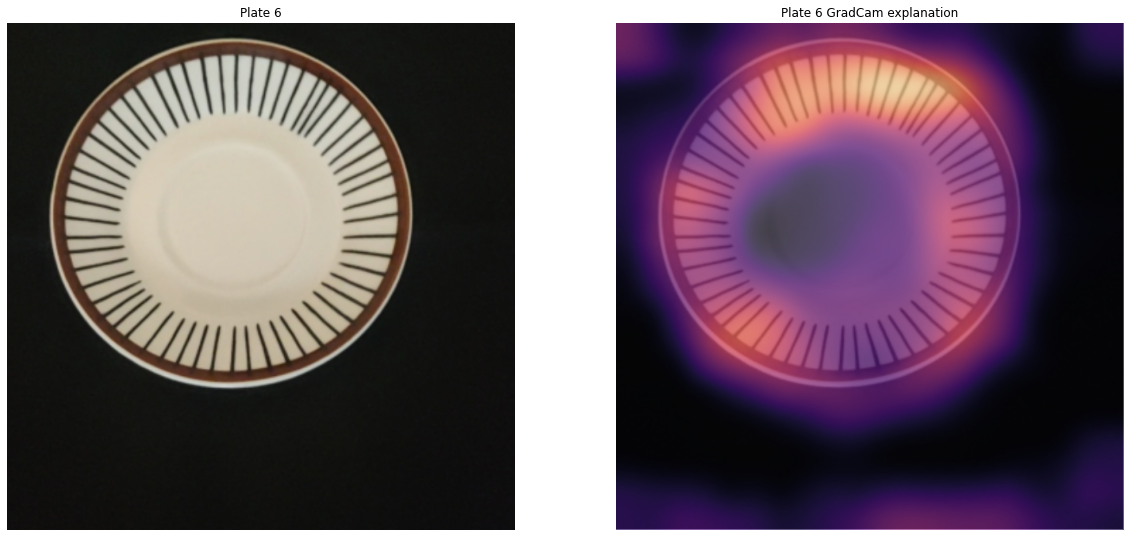

In [9]:
generate_cam(learn, path_img+'/valid/tallrik_1/1586527524387-0006.png', 1)
generate_cam(learn, path_img+'/valid/tallrik_2/1586527650509-0015.png', 2)
generate_cam(learn, path_img+'/valid/tallrik_3/1586527774489-0010.png', 3)
generate_cam(learn, path_img+'/valid/tallrik_4/1586527881568-0003.png', 4)
generate_cam(learn, path_img+'/valid/tallrik_5/1586527988265-0002.png', 5)
generate_cam(learn, path_img+'/valid/tallrik_6/1586528086152-0010.png', 6)